Question 6: Implementing a Custom Cross-Validation Loop<br>
Task: Write a custom cross-validation loop for a Support Vector Machine model with varying 'C' parameter and plot the results.

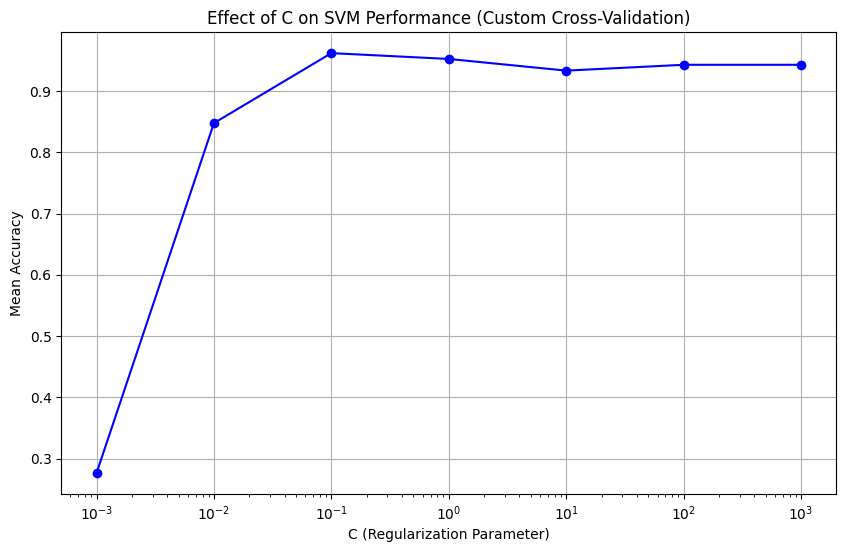

Best 'C' value: 0.1
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
# Write your code here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

# Load the Iris dataset (a classic classification problem)
data = load_iris()
X = data.data
y = data.target

# Step 1: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Custom k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Step 3: Varying the 'C' parameter
C_values = np.logspace(-3, 3, 7)  # Range of 'C' from 0.001 to 1000
mean_accuracies = []

# Step 4: Perform the custom cross-validation loop
for C in C_values:
    accuracies = []
    
    # Loop through each fold
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        
        # Initialize and train the SVM with the current 'C' value
        svm_model = SVC(C=C, kernel='linear', random_state=42)
        svm_model.fit(X_train_fold, y_train_fold)
        
        # Predict on validation fold
        y_pred = svm_model.predict(X_val_fold)
        
        # Calculate accuracy for this fold
        accuracies.append(accuracy_score(y_val_fold, y_pred))
    
    # Calculate the mean accuracy for this 'C' value
    mean_accuracies.append(np.mean(accuracies))

# Step 5: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(C_values, mean_accuracies, marker='o', linestyle='-', color='b')
plt.xscale('log')  # Log scale for 'C' values
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Mean Accuracy')
plt.title('Effect of C on SVM Performance (Custom Cross-Validation)')
plt.grid(True)
plt.show()

# Step 6: Evaluate the final model on the test set with the best 'C' value
best_C = C_values[np.argmax(mean_accuracies)]
best_svm_model = SVC(C=best_C, kernel='linear', random_state=42)
best_svm_model.fit(X_train, y_train)
y_pred_test = best_svm_model.predict(X_test)


from sklearn.metrics import classification_report
print(f"Best 'C' value: {best_C}")
print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred_test))
